In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#PCA
from sklearn.decomposition import PCA

#Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import math
from math import ceil

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

sns.set()

In [2]:
%store -r df
%store -r df_scaled

In [3]:
df_scaled.shape

(31875, 47)

In [4]:
df.shape

(31875, 60)

#### PCA

In [5]:
df_pca = df_scaled.loc[:, ~df_scaled.columns.str.startswith('HR')].set_index(df_scaled.index)
df_pca.shape

(31875, 23)

In [6]:
pca = PCA()
pca_feat = pca.fit_transform(df_pca)

In [7]:
# Get PCA output as table

# Get the eigenvalues (explained variance)
explained_variance = pca.explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# get the cumulative explained variance ratio 
# Hint: use np.cumsum()
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Combine into a dataframe
pca_results = pd.DataFrame(
    {
        "Eigenvalue": explained_variance,
        "Difference": np.insert(np.diff(explained_variance), 0, 0),
        "Proportion": explained_variance_ratio,
        "Cumulative": cumulative_explained_variance_ratio
    },
        index=range(1, pca.n_components_ + 1)
)

pca_results

,Eigenvalue,Difference,Proportion,Cumulative
1,9.528307e+00,0.000000e+00,4.142612e-01,0.414261
2,3.302682e+00,-6.225625e+00,1.435904e-01,0.557852
3,2.478566e+00,-8.241165e-01,1.077603e-01,0.665612
4,2.049615e+00,-4.289509e-01,8.911089e-02,0.754723
5,1.052765e+00,-9.968503e-01,4.577094e-02,0.800494
6,9.679813e-01,-8.478326e-02,4.208482e-02,0.842579
7,8.701238e-01,-9.785745e-02,3.783028e-02,0.880409
8,7.463186e-01,-1.238052e-01,3.244762e-02,0.912857
9,5.485517e-01,-1.977670e-01,2.384932e-02,0.936706
10,4.151868e-01,-1.333648e-01,1.805104e-02,0.954757


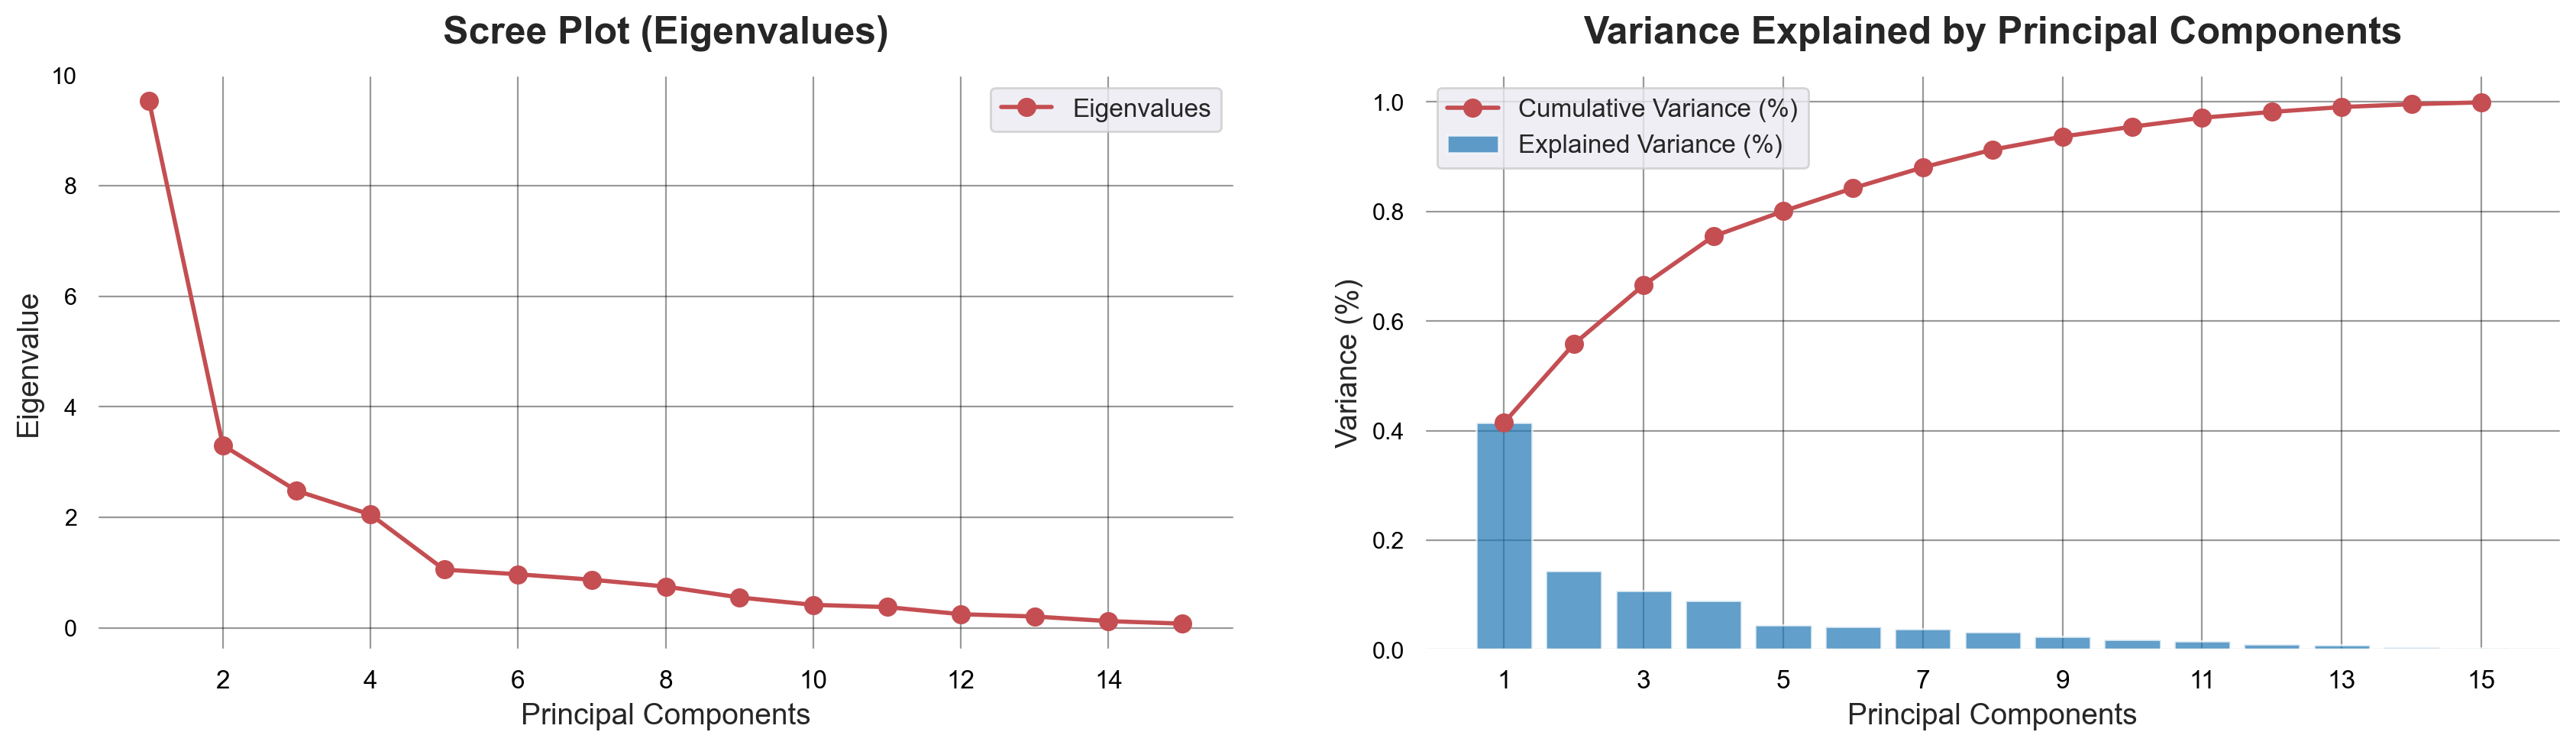

In [8]:
n_pcas = 15

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), facecolor='white')

# Plot 1: Scree Plot (Eigenvalues)
ax1.plot(range(1, n_pcas + 1), explained_variance[:n_pcas], 'ro-', linewidth=2, markersize=8, label='Eigenvalues')
ax1.set_title("Scree Plot (Eigenvalues)", fontsize=18, pad=15, fontweight='bold')
ax1.set_xlabel("Principal Components", fontsize=14)
ax1.set_ylabel("Eigenvalue", fontsize=14)
ax1.set_xticks(range(2, n_pcas + 1, 2))
ax1.set_xticklabels(range(2, n_pcas + 1, 2), fontsize=12)
ax1.set_facecolor('white')
ax1.grid(True, color='black', linestyle='-', linewidth=0.8, alpha=0.4)  # Lighter grid lines
ax1.tick_params(axis='both', which='both', colors='black', width=1)  # Black ticks with better visibility
ax1.legend(fontsize=12, loc='upper right')

# Plot 2: Explained Variance as a Bar Chart (up to 30 PCs)
ax2.bar(range(1, n_pcas + 1), explained_variance_ratio[:n_pcas], 
        color='#1f77b4', alpha=0.7, label='Explained Variance (%)', width=0.8)  # Customize bar color
ax2.plot(range(1, n_pcas + 1), cumulative_explained_variance_ratio[:n_pcas], 
         'ro-', linewidth=2, markersize=8, label='Cumulative Variance (%)')

# Customize the plot
ax2.set_title("Variance Explained by Principal Components", fontsize=18, pad=15, fontweight='bold')
ax2.set_xlabel("Principal Components", fontsize=14)
ax2.set_ylabel("Variance (%)", fontsize=14)
ax2.set_xticks(range(1, n_pcas + 1, 2))  # Show every 2nd PC for clarity
ax2.set_xticklabels(range(1, n_pcas + 1, 2), fontsize=12)
ax2.set_facecolor('white')
ax2.grid(True, color='black', linestyle='-', linewidth=0.8, alpha=0.4)  # Lighter grid lines
ax2.tick_params(axis='both', which='both', colors='black', width=1)  # Black ticks with better visibility

# Add legend
ax2.legend(fontsize=12, loc='upper left')

# Adjust layout to ensure everything fits and has proper padding
plt.tight_layout(pad=4.0)

# Show plot
plt.show()


 Cumulative percentage of total variance
* keep 80% of total variance
 Kaiser's rule
* keep PC var >=1
 Scree plot
* elbow method

In [9]:
# we decided to retain 5 PCAs as its an Elbow and allows us to retain around 80% of variance as well as around 1 PC variance
pca = PCA(n_components=5)
pca_feat = pca.fit_transform(df_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]

# remember index=df_pca.index
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  

In [10]:
df_pca_final = pd.concat([df_pca, pca_df], axis=1)
correlation_matrix = df_pca_final[pca_feat_names + df_pca.columns.tolist()].corr()
loadings = correlation_matrix.loc[pca_feat_names, df_pca.columns]

def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: #ffbdbd'
    elif val > 0.45:
        color = 'background-color: #b3ffcc'
    else:
        color = ''
    return color

loadings.style.applymap(_color_red_or_green)

,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,CUI_Other,Weekday_orders,Weekend_orders
PC0,0.865635,0.940314,0.797190,-0.421835,0.534358,0.377386,0.369731,0.936388,0.822654,-0.083098,0.093072,-0.442568,-0.534358,0.765966,0.772055,0.489298,0.436898,-0.442568,0.822654,0.183153,0.746467,0.850385,0.816223
PC1,0.000678,0.193577,0.010083,0.391206,-0.168887,0.076594,0.270132,0.093569,0.371731,0.600789,0.482444,0.763650,0.168887,-0.455247,-0.152192,-0.154292,0.122618,0.763650,0.371731,0.747892,0.297581,0.095925,0.067699
PC2,0.091097,0.142087,0.097230,-0.621608,-0.764346,0.054745,0.086891,0.107853,0.161396,0.112693,0.144296,0.010108,0.764346,-0.083080,0.056708,0.000637,-0.710010,0.010108,0.161396,-0.473895,0.143070,0.098219,0.093669
PC3,-0.177760,-0.130665,-0.385893,-0.041038,0.189998,0.048801,0.444899,-0.254349,0.284152,0.663609,0.582964,-0.403700,-0.189998,0.182293,-0.198483,-0.003456,-0.028836,-0.403700,0.284152,-0.255639,0.063616,-0.230612,-0.222186
PC4,-0.326184,0.004202,-0.078873,-0.029796,-0.040934,0.466726,0.074237,0.035272,0.097089,-0.102375,-0.219947,0.028907,0.040934,-0.007337,-0.413595,0.669861,0.018722,0.028907,0.097089,0.058199,-0.079762,0.036411,0.025203


In [11]:
df_pca_final.shape

(31875, 28)

### Clustering

In [12]:
metric_features = df_pca_final.select_dtypes(include=np.number).set_index(df_pca_final.index).columns.tolist()
pc_features = df_pca_final.columns[df_pca_final.columns.str.startswith('PC')].tolist()
non_metric_features = df.columns[df.columns.str.startswith(('customer_', 'last_', 'payment_'))].tolist()
non_metric_features_df = df.loc[:, non_metric_features].set_index(df.index)

In [13]:
non_metric_features_d = non_metric_features_df.reindex(range(31875))

In [14]:
df_pca_final = df_pca_final.reindex(range(31875))

In [15]:
df = pd.concat([df_pca_final, non_metric_features_df], axis=1)

In [16]:
df.shape

(31888, 42)

In [17]:
df.isna().sum()

vendor_count               13
product_count              13
is_chain                   13
first_order                13
last_order                 13
CUI_American               13
CUI_Asian                  13
Total_Orders_Per_Client    13
mnt                        13
mnt_Per_Order              13
Items_Per_Order            13
frq                        13
rcn                        13
activity                   13
CUI_diversity              13
Loyalty                    13
Recency_Score              13
Frequency_Score            13
Monetary_Score             13
CLV_Score                  13
CUI_Other                  13
Weekday_orders             13
Weekend_orders             13
PC0                        13
PC1                        13
PC2                        13
PC3                        13
PC4                        13
last_order                 13
customer_region_2360       26
customer_region_2440       26
customer_region_2490       26
customer_region_4140       26
customer_r

#### Hierarchical Clustering

In [18]:
# Performing HC
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(df[metric_features])
hc_labels

ValueError: Input X contains NaN.
AgglomerativeClustering does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values